In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, label_binarize
pd.options.display.max_columns = None
import json

In [21]:
df = pd.read_csv('train.csv')
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [22]:
dict_nombres = {
'Marital status':'est_civil',
'Application mode':'modo_solicitud',
'Application order':'orden_solicitud',
'Course':'curso',
'Daytime/evening attendance':'tip_asistencia',
'Previous qualification':'estudio_previo',
'Previous qualification (grade)':'nota_estudio_previo',
'Nacionality':'nacionalidad',
'Mother\'s qualification':'estudio_madre',
'Father\'s qualification':'estudio_padre',
'Mother\'s occupation':'profesion_madre',
'Father\'s occupation':'profesion_padre',
'Admission grade':'nota_admision',
'Displaced':'trasladado',
'Educational special needs':'necesidad_educativa_especial',
'Debtor':'deudor',
'Tuition fees up to date':'pension_al_dia',
'Gender':'genero',
'Scholarship holder':'becario',
'Age at enrollment':'edad_inscripcion',
'International':'internacional',
'Curricular units 1st sem (credited)':'num_curso_acreditado_primer_semestre',
'Curricular units 1st sem (enrolled)':'num_curso_matriculado_primer_semestre',
'Curricular units 1st sem (evaluations)':'num_curso_evaluado_primer_semestre',
'Curricular units 1st sem (approved)':'num_curso_aprobado_primer_semestre',
'Curricular units 1st sem (grade)':'num_curso_calificado_primer_semestre',
'Curricular units 1st sem (without evaluations)':'num_curso_sin_evaluacion_primer_semestre',
'Curricular units 2nd sem (credited)':'num_curso_acreditado_segundo_semestre',
'Curricular units 2nd sem (enrolled)':'num_curso_matriculado_segundo_semestre',
'Curricular units 2nd sem (evaluations)':'num_curso_evaluado_segundo_semestre',
'Curricular units 2nd sem (approved)':'num_curso_aprobado_segundo_semestre',
'Curricular units 2nd sem (grade)':'num_curso_calificado_segundo_semestre',
'Curricular units 2nd sem (without evaluations)':'num_curso_sin_evaluacion_segundo_semestre', 
'Unemployment rate':'ratio_desempleo',
'Inflation rate':'ratio_inflacion', 
'GDP':'pbi', 
'Target':'target'
}

In [23]:
with open('dict_nombres.json') as file:
    dict_nombres = json.load(file)
dict_nombres

{'Marital status': 'est_civil',
 'Application mode': 'modo_solicitud',
 'Application order': 'orden_solicitud',
 'Course': 'curso',
 'Daytime/evening attendance': 'tip_asistencia',
 'Previous qualification': 'estudio_previo',
 'Previous qualification (grade)': 'nota_estudio_previo',
 'Nacionality': 'nacionalidad',
 "Mother's qualification": 'estudio_madre',
 "Father's qualification": 'estudio_padre',
 "Mother's occupation": 'profesion_madre',
 "Father's occupation": 'profesion_padre',
 'Admission grade': 'nota_admision',
 'Displaced': 'trasladado',
 'Educational special needs': 'necesidad_educativa_especial',
 'Debtor': 'deudor',
 'Tuition fees up to date': 'pension_al_dia',
 'Gender': 'genero',
 'Scholarship holder': 'becario',
 'Age at enrollment': 'edad_inscripcion',
 'International': 'internacional',
 'Curricular units 1st sem (credited)': 'num_curso_acreditado_primer_semestre',
 'Curricular units 1st sem (enrolled)': 'num_curso_matriculado_primer_semestre',
 'Curricular units 1st 

In [24]:
df.rename(columns = dict_nombres, inplace = True) 
df

,id,est_civil,modo_solicitud,orden_solicitud,curso,tip_asistencia,estudio_previo,nota_estudio_previo,nacionalidad,estudio_madre,estudio_padre,profesion_madre,profesion_padre,nota_admision,trasladado,necesidad_educativa_especial,deudor,pension_al_dia,genero,becario,edad_inscripcion,internacional,num_curso_acreditado_primer_semestre,num_curso_matriculado_primer_semestre,num_curso_evaluado_primer_semestre,num_curso_aprobado_primer_semestre,num_curso_calificado_primer_semestre,num_curso_sin_evaluacion_primer_semestre,num_curso_acreditado_segundo_semestre,num_curso_matriculado_segundo_semestre,num_curso_evaluado_segundo_semestre,num_curso_aprobado_segundo_semestre,num_curso_calificado_segundo_semestre,num_curso_sin_evaluacion_segundo_semestre,ratio_desempleo,ratio_inflacion,pbi,target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [25]:
var_dummies = [
'est_civil',
'modo_solicitud',
'curso',
'estudio_previo',
'nacionalidad',
'estudio_madre',
'estudio_padre',
'profesion_madre',
'profesion_padre'
]

df1 = df.copy()

for col in var_dummies:
    dfDummie = pd.get_dummies(df[col], prefix = col).astype(int)
    df1 = pd.concat([df1, dfDummie], axis = 1)#.drop(columns = col)

df1


,id,est_civil,modo_solicitud,orden_solicitud,curso,tip_asistencia,estudio_previo,nota_estudio_previo,nacionalidad,estudio_madre,estudio_padre,profesion_madre,profesion_padre,nota_admision,trasladado,necesidad_educativa_especial,deudor,pension_al_dia,genero,becario,edad_inscripcion,internacional,num_curso_acreditado_primer_semestre,num_curso_matriculado_primer_semestre,num_curso_evaluado_primer_semestre,num_curso_aprobado_primer_semestre,num_curso_calificado_primer_semestre,num_curso_sin_evaluacion_primer_semestre,num_curso_acreditado_segundo_semestre,num_curso_matriculado_segundo_semestre,num_curso_evaluado_segundo_semestre,num_curso_aprobado_segundo_semestre,num_curso_calificado_segundo_semestre,num_curso_sin_evaluacion_segundo_semestre,ratio_desempleo,ratio_inflacion,pbi,target,est_civil_1,est_civil_2,est_civil_3,est_civil_4,est_civil_5,est_civil_6,modo_solicitud_1,modo_solicitud_2,modo_solicitud_3,modo_solicitud_4,modo_solicitud_5,modo_solicitud_7,modo_solicitud_9,modo_solicitud_10,modo_solicitud_12,modo_solicitud_15,modo_solicitud_16,modo_solicitud_17,modo_solicitud_18,modo_solicitud_26,modo_solicitud_27,modo_solicitud_35,modo_solicitud_39,modo_solicitud_42,modo_solicitud_43,modo_solicitud_44,modo_solicitud_51,modo_solicitud_53,curso_33,curso_39,curso_171,curso_979,curso_8014,curso_9003,curso_9070,curso_9085,curso_9119,curso_9130,curso_9147,curso_9238,curso_9254,curso_9500,curso_9556,curso_9670,curso_9773,curso_9853,curso_9991,estudio_previo_1,estudio_previo_2,estudio_previo_3,estudio_previo_4,estudio_previo_5,estudio_previo_6,estudio_previo_9,estudio_previo_10,estudio_previo_11,estudio_previo_12,estudio_previo_14,estudio_previo_15,estudio_previo_17,estudio_previo_19,estudio_previo_36,estudio_previo_37,estudio_previo_38,estudio_previo_39,estudio_previo_40,estudio_previo_42,estudio_previo_43,nacionalidad_1,nacionalidad_2,nacionalidad_6,nacionalidad_11,nacionalidad_17,nacionalidad_21,nacionalidad_22,nacionalidad_24,nacionalidad_25,nacionalidad_26,nacionalidad_32,nacionalidad_41,nacionalidad_62,nacionalidad_100,nacionalidad_101,nacionalidad_103,nacionalidad_105,nacionalidad_109,estudio_madre_1,estudio_madre_2,estudio_madre_3,estudio_madre_4,estudio_madre_5,estudio_madre_6,estudio_madre_7,estudio_madre_8,estudio_madre_9,estudio_madre_10,estudio_madre_11,estudio_madre_12,estudio_madre_14,estudio_madre_15,estudio_madre_18,estudio_madre_19,estudio_madre_22,estudio_madre_26,estudio_madre_27,estudio_madre_28,estudio_madre_29,estudio_madre_30,estudio_madre_31,estudio_madre_33,estudio_madre_34,estudio_madre_35,estudio_madre_36,estudio_madre_37,estudio_madre_38,estudio_madre_39,estudio_madre_40,estudio_madre_41,estudio_madre_42,estudio_madre_43,estudio_madre_44,estudio_padre_1,estudio_padre_2,estudio_padre_3,estudio_padre_4,estudio_padre_5,estudio_padre_6,estudio_padre_7,estudio_padre_9,estudio_padre_10,estudio_padre_11,estudio_padre_12,estudio_padre_13,estudio_padre_14,estudio_padre_15,estudio_padre_18,estudio_padre_19,estudio_padre_20,estudio_padre_21,estudio_padre_22,estudio_padre_23,estudio_padre_24,estudio_padre_25,estudio_padre_26,estudio_padre_27,estudio_padre_29,estudio_padre_30,estudio_padre_31,estudio_padre_33,estudio_padre_34,estudio_padre_35,estudio_padre_36,estudio_padre_37,estudio_padre_38,estudio_padre_39,estudio_padre_40,estudio_padre_41,estudio_padre_42,estudio_padre_43,estudio_padre_44,profesion_madre_0,profesion_madre_1,profesion_madre_2,profesion_madre_3,profesion_madre_4,profesion_madre_5,profesion_madre_6,profesion_madre_7,profesion_madre_8,profesion_madre_9,profesion_madre_10,profesion_madre_11,profesion_madre_38,profesion_madre_90,profesion_madre_99,profesion_madre_101,profesion_madre_103,profesion_madre_122,profesion_madre_123,profesion_madre_124,profesion_madre_125,profesion_madre_127,profesion_madre_131,profesion_madre_132,profesion_madre_134,profesion_madre_141,profesion_madre_143,profesion_madre_144,profesion_madre_151,profesion_madre_152,profesion_madre_153,profesion_madre_163,profesion_madre_171,profesio

## Modelado

In [26]:
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model


In [27]:
var_numericas = [
       'estudio_previo',
       'nota_admision',
       'edad_inscripcion',
       'num_curso_acreditado_primer_semestre',
       'num_curso_matriculado_primer_semestre',
       'num_curso_evaluado_primer_semestre',
       'num_curso_aprobado_primer_semestre',
       'num_curso_calificado_primer_semestre',
       'num_curso_sin_evaluacion_primer_semestre',
       'num_curso_acreditado_segundo_semestre',
       'num_curso_matriculado_segundo_semestre',
       'num_curso_evaluado_segundo_semestre',
       'num_curso_aprobado_segundo_semestre',
       'num_curso_calificado_segundo_semestre',
       'num_curso_sin_evaluacion_segundo_semestre', 
       'ratio_desempleo',
       'ratio_inflacion', 
       'pbi'
]
var_categoricas = list((set(df1.columns.tolist()) - set(['target','id','orden_solicitud'])) - set(var_numericas))
var_categoricas

['estudio_padre_29',
 'modo_solicitud_15',
 'estudio_padre_2',
 'profesion_madre_9',
 'estudio_padre_20',
 'profesion_madre_173',
 'curso_39',
 'estudio_madre_5',
 'estudio_madre_27',
 'nacionalidad_22',
 'curso_9238',
 'profesion_madre_1',
 'estudio_madre_2',
 'estudio_previo_1',
 'modo_solicitud_1',
 'curso_9147',
 'estudio_madre_3',
 'profesion_madre_132',
 'profesion_madre_151',
 'profesion_madre_143',
 'profesion_madre_10',
 'profesion_padre_10',
 'profesion_madre_163',
 'estudio_previo_10',
 'profesion_madre_171',
 'estudio_madre_31',
 'estudio_padre_41',
 'profesion_madre_124',
 'estudio_madre_4',
 'estudio_padre_3',
 'profesion_madre_191',
 'estudio_padre_19',
 'profesion_madre_125',
 'profesion_padre_19',
 'profesion_padre_181',
 'modo_solicitud_26',
 'curso_9085',
 'estudio_padre_24',
 'profesion_padre_0',
 'estudio_padre_13',
 'estudio_madre_19',
 'modo_solicitud',
 'modo_solicitud_17',
 'nacionalidad',
 'modo_solicitud_18',
 'estudio_madre_33',
 'estudio_padre_35',
 'curso_

In [28]:
exp_clf101 = setup(data=df1, 
                   target='target', 
                   session_id=123, 
                   train_size=0.7, 
                   ignore_features=['id']
                   )

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 294)"
5,Transformed data shape,"(76518, 293)"
6,Transformed train set shape,"(53562, 293)"
7,Transformed test set shape,"(22956, 293)"
8,Ignore features,1
9,Numeric features,292


In [29]:
# Comparación de modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8310,0.9435,0.8310,0.8304,0.8294,0.7279,0.7293,1.0210
gbc,Gradient Boosting Classifier,0.8275,0.0000,0.8275,0.8265,0.8255,0.7219,0.7235,11.9920
rf,Random Forest Classifier,0.8240,0.9371,0.8240,0.8211,0.8205,0.7150,0.7173,2.4760
ada,Ada Boost Classifier,0.8200,0.0000,0.8200,0.8202,0.8184,0.7099,0.7118,2.7900
et,Extra Trees Classifier,0.8161,0.9329,0.8161,0.8124,0.8114,0.7011,0.7042,4.0870
lda,Linear Discriminant Analysis,0.8106,0.0000,0.8106,0.8145,0.8091,0.6939,0.6974,1.6490
ridge,Ridge Classifier,0.8026,0.0000,0.8026,0.7984,0.7908,0.6729,0.6835,0.3760
lr,Logistic Regression,0.7907,0.0000,0.7907,0.7889,0.7865,0.6603,0.6638,21.3200
dt,Decision Tree Classifier,0.7433,0.8044,0.7433,0.7443,0.7437,0.5917,0.5917,0.5560
knn,K Neighbors Classifier,0.7281,0.8536,0.7281,0.7224,0.7241,0.5608,0.5620,2.2970


In [30]:
# Creación de un modelo específico
dt = create_model('lightgbm')  # Random Forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8372,0.9462,0.8372,0.8373,0.8363,0.7386,0.7396
1,0.8247,0.9417,0.8247,0.8240,0.8233,0.7180,0.7192
2,0.8208,0.9383,0.8208,0.8204,0.8192,0.7112,0.7127
3,0.8387,0.9485,0.8387,0.8386,0.8374,0.7404,0.7418
4,0.8294,0.9439,0.8294,0.8281,0.8276,0.7251,0.7264
5,0.8282,0.9412,0.8282,0.8247,0.8247,0.7221,0.7241
6,0.8320,0.9443,0.8320,0.8315,0.8304,0.7293,0.7308
7,0.8284,0.9426,0.8284,0.8294,0.8273,0.7238,0.7255
8,0.8368,0.9433,0.8368,0.8353,0.8349,0.7371,0.7384


In [31]:
# Optimización de hiperparámetros

# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2]
}

# Perform Bayesian Search
tuned_dt = tune_model(dt, custom_grid=param_grid_bayesian, search_library='scikit-learn', search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8372,0.9462,0.8372,0.8373,0.8363,0.7386,0.7396
1,0.8247,0.9417,0.8247,0.8240,0.8233,0.7180,0.7192
2,0.8208,0.9383,0.8208,0.8204,0.8192,0.7112,0.7127
3,0.8387,0.9485,0.8387,0.8386,0.8374,0.7404,0.7418
4,0.8294,0.9439,0.8294,0.8281,0.8276,0.7251,0.7264
5,0.8282,0.9412,0.8282,0.8247,0.8247,0.7221,0.7241
6,0.8320,0.9443,0.8320,0.8315,0.8304,0.7293,0.7308
7,0.8284,0.9426,0.8284,0.8294,0.8273,0.7238,0.7255
8,0.8368,0.9433,0.8368,0.8353,0.8349,0.7371,0.7384


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


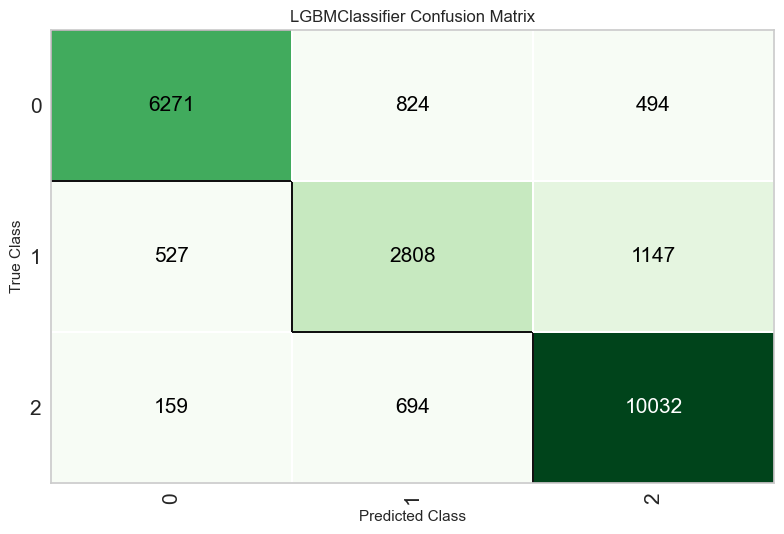

In [32]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

In [33]:
# Visualización exhaustiva del modelo
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

In [35]:
df_test = pd.read_csv('test.csv')
df_test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [36]:
df_test.rename(columns = dict_nombres, inplace = True) 
df_test

,id,est_civil,modo_solicitud,orden_solicitud,curso,tip_asistencia,estudio_previo,nota_estudio_previo,nacionalidad,estudio_madre,...,num_curso_sin_evaluacion_primer_semestre,num_curso_acreditado_segundo_semestre,num_curso_matriculado_segundo_semestre,num_curso_evaluado_segundo_semestre,num_curso_aprobado_segundo_semestre,num_curso_calificado_segundo_semestre,num_curso_sin_evaluacion_segundo_semestre,ratio_desempleo,ratio_inflacion,pbi
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [39]:
var_dummies = [
'est_civil',
'modo_solicitud',
'curso',
'estudio_previo',
'nacionalidad',
'estudio_madre',
'estudio_padre',
'profesion_madre',
'profesion_padre'
]

df2 = df_test.copy()

for col in var_dummies:
    dfDummie = pd.get_dummies(df2[col], prefix = col).astype(int)
    df2 = pd.concat([df2, dfDummie], axis = 1)#.drop(columns = col)


col_nuevas = (set(df1.columns) - set(df2.columns)) - set(['target','id'])
for col in col_nuevas:
    df2[col] = 0

df2

,id,est_civil,modo_solicitud,orden_solicitud,curso,tip_asistencia,estudio_previo,nota_estudio_previo,nacionalidad,estudio_madre,...,profesion_madre_163,profesion_padre_191,profesion_padre_13,estudio_madre_15,profesion_madre_103,profesion_padre_148,profesion_madre_11,estudio_previo_36,profesion_padre_22,profesion_madre_172
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,0,0,0,0,0,0,0,0
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0,0,0,0,0
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,0,0,0,0,0,0,0,0
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0,0,0,0,0
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Realizar predicciones
predictions = predict_model(final_dt, data=df2)
predictions

,id,est_civil,modo_solicitud,orden_solicitud,curso,tip_asistencia,estudio_previo,nota_estudio_previo,nacionalidad,estudio_madre,...,profesion_padre_13,estudio_madre_15,profesion_madre_103,profesion_padre_148,profesion_madre_11,estudio_previo_36,profesion_padre_22,profesion_madre_172,prediction_label,prediction_score
0,76518,1,1,1,9500,1,1,141.000000,1,3,...,0,0,0,0,0,0,0,0,Dropout,0.9936
1,76519,1,1,1,9238,1,1,128.000000,1,1,...,0,0,0,0,0,0,0,0,Graduate,0.9731
2,76520,1,1,1,9238,1,1,118.000000,1,1,...,0,0,0,0,0,0,0,0,Graduate,0.7238
3,76521,1,44,1,9147,1,39,130.000000,1,1,...,0,0,0,0,0,0,0,0,Enrolled,0.4361
4,76522,1,39,1,9670,1,1,110.000000,1,1,...,0,0,0,0,0,0,0,0,Enrolled,0.6284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.000000,1,38,...,0,0,0,0,0,0,0,0,Dropout,0.8685
51008,127526,2,39,1,9119,1,19,133.100006,1,19,...,0,0,0,0,0,0,0,0,Dropout,0.9835
51009,127527,1,1,1,171,1,1,127.000000,1,1,...,0,0,0,0,0,0,0,0,Dropout,0.9876
51010,127528,1,1,3,9773,1,1,132.000000,1,19,...,0,0,0,0,0,0,0,0,Dropout,0.9133


In [44]:
dfSalida = predictions[['id','prediction_label']].rename(columns = {'prediction_label':'Target'})
dfSalida

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [45]:
dfSalida.to_csv( 'submission_1.csv', index = False)